In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

No Consideration of Tesla or not

In [3]:
df = pd.read_csv("Final Data.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "Tweet", "text", "Tweet URL", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Price Change"])
df.head()

,Percent Change,Positive,Neutral,Negative,Compound,TESLA
0,1.0,0.250,0.750,0.0,0.8997,1
1,0.0,0.000,1.000,0.0,0.0000,0
2,6.0,0.133,0.867,0.0,0.3818,0
3,1.0,0.000,1.000,0.0,0.0000,1
4,-1.0,0.233,0.767,0.0,0.8705,0


In [4]:
lm = LinearRegression()

In [5]:
X = df[["Positive", "Neutral", "Negative"]]
y = df["Percent Change"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [6]:
lm.fit(X_train,y_train)

LinearRegression()

In [7]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Positive,-1593.778815
Neutral,-1596.000857
Negative,-1599.179065


In [8]:
pred = lm.predict(X_test)

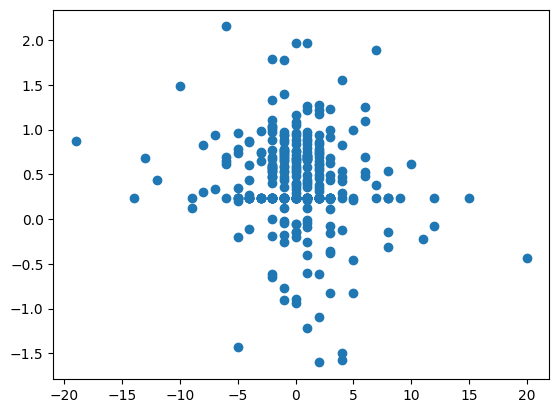

In [9]:
plt.scatter(y_test, pred)

In [10]:
metrics.mean_absolute_error(y_test,pred)

2.5718541287534276

In [11]:
metrics.mean_squared_error(y_test,pred)

14.604181354062593

In [12]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

3.821541750924958

Only if Tesla included

In [14]:
Tesladf = df[df["TESLA"] == 1]

In [15]:
Tesladf.head()

,Percent Change,Positive,Neutral,Negative,Compound,TESLA
0,1.0,0.250,0.750,0.000,0.8997,1
3,1.0,0.000,1.000,0.000,0.0000,1
16,3.0,0.000,0.877,0.123,-0.5994,1
33,-1.0,0.061,0.862,0.077,-0.0376,1
45,0.0,0.102,0.717,0.181,-0.2732,1


In [16]:
lm = LinearRegression()

In [17]:
X = Tesladf[["Positive", "Neutral", "Negative"]]
y = Tesladf["Percent Change"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Positive,3221.662110
Neutral,3216.332287
Negative,3218.243902


In [20]:
pred = lm.predict(X_test)

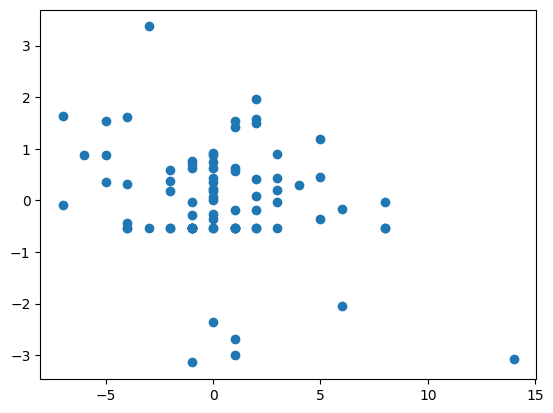

In [21]:
plt.scatter(y_test, pred)

In [22]:
metrics.mean_absolute_error(y_test,pred)

2.735214557057243

In [23]:
metrics.mean_squared_error(y_test,pred)

15.741761443839456

3.9675888703139917